<a href="https://colab.research.google.com/github/carlosrome/ML-Research-Project-Physics/blob/main/RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **Import required packages and set random seed**

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#Set random seed
np.random.seed(42)

### **Load and shuffle data**

In [3]:
data = np.load('/content/gdrive/My Drive/array_heights.npy')
np.random.shuffle(data)

### **Separate features from labels and normalize feature values**

In [4]:
X = data[:,:5]
y = data[:,5:]
from sklearn import preprocessing
X = preprocessing.normalize(X)

### **Create training, validation, and test datasets**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### **Cross-validate with GridSearchCV**

In [6]:
model = RandomForestClassifier(random_state = 42)
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to search over
params = {'max_depth': [None, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 8], 'n_estimators': [100,200,300,400]}

# Use cross-validation to tune the hyperparameters
search = GridSearchCV(model, params, cv=5, scoring='accuracy')
search.fit(X_train, y_train.ravel())

# Print the best hyperparameters and score
print("Best hyperparameters:", search.best_params_)
print("Best score:", search.best_score_)

Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 400}
Best score: 0.7638888888888888


### **Create and fit model with optimal parameters**

In [7]:
model = RandomForestClassifier(random_state = 42, max_depth = search.best_params_["max_depth"], min_samples_split =search.best_params_["min_samples_split"], n_estimators = search.best_params_["n_estimators"])
model.fit(X_train,y_train.ravel())

RandomForestClassifier(n_estimators=400, random_state=42)

### **Predict and evaluate accuracy**


In [8]:
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.7828282828282829

### **Plot a sample tree from random forest**

In [9]:
estimator = model.estimators_[1]
estimator


DecisionTreeClassifier(max_features='sqrt', random_state=1273642419)

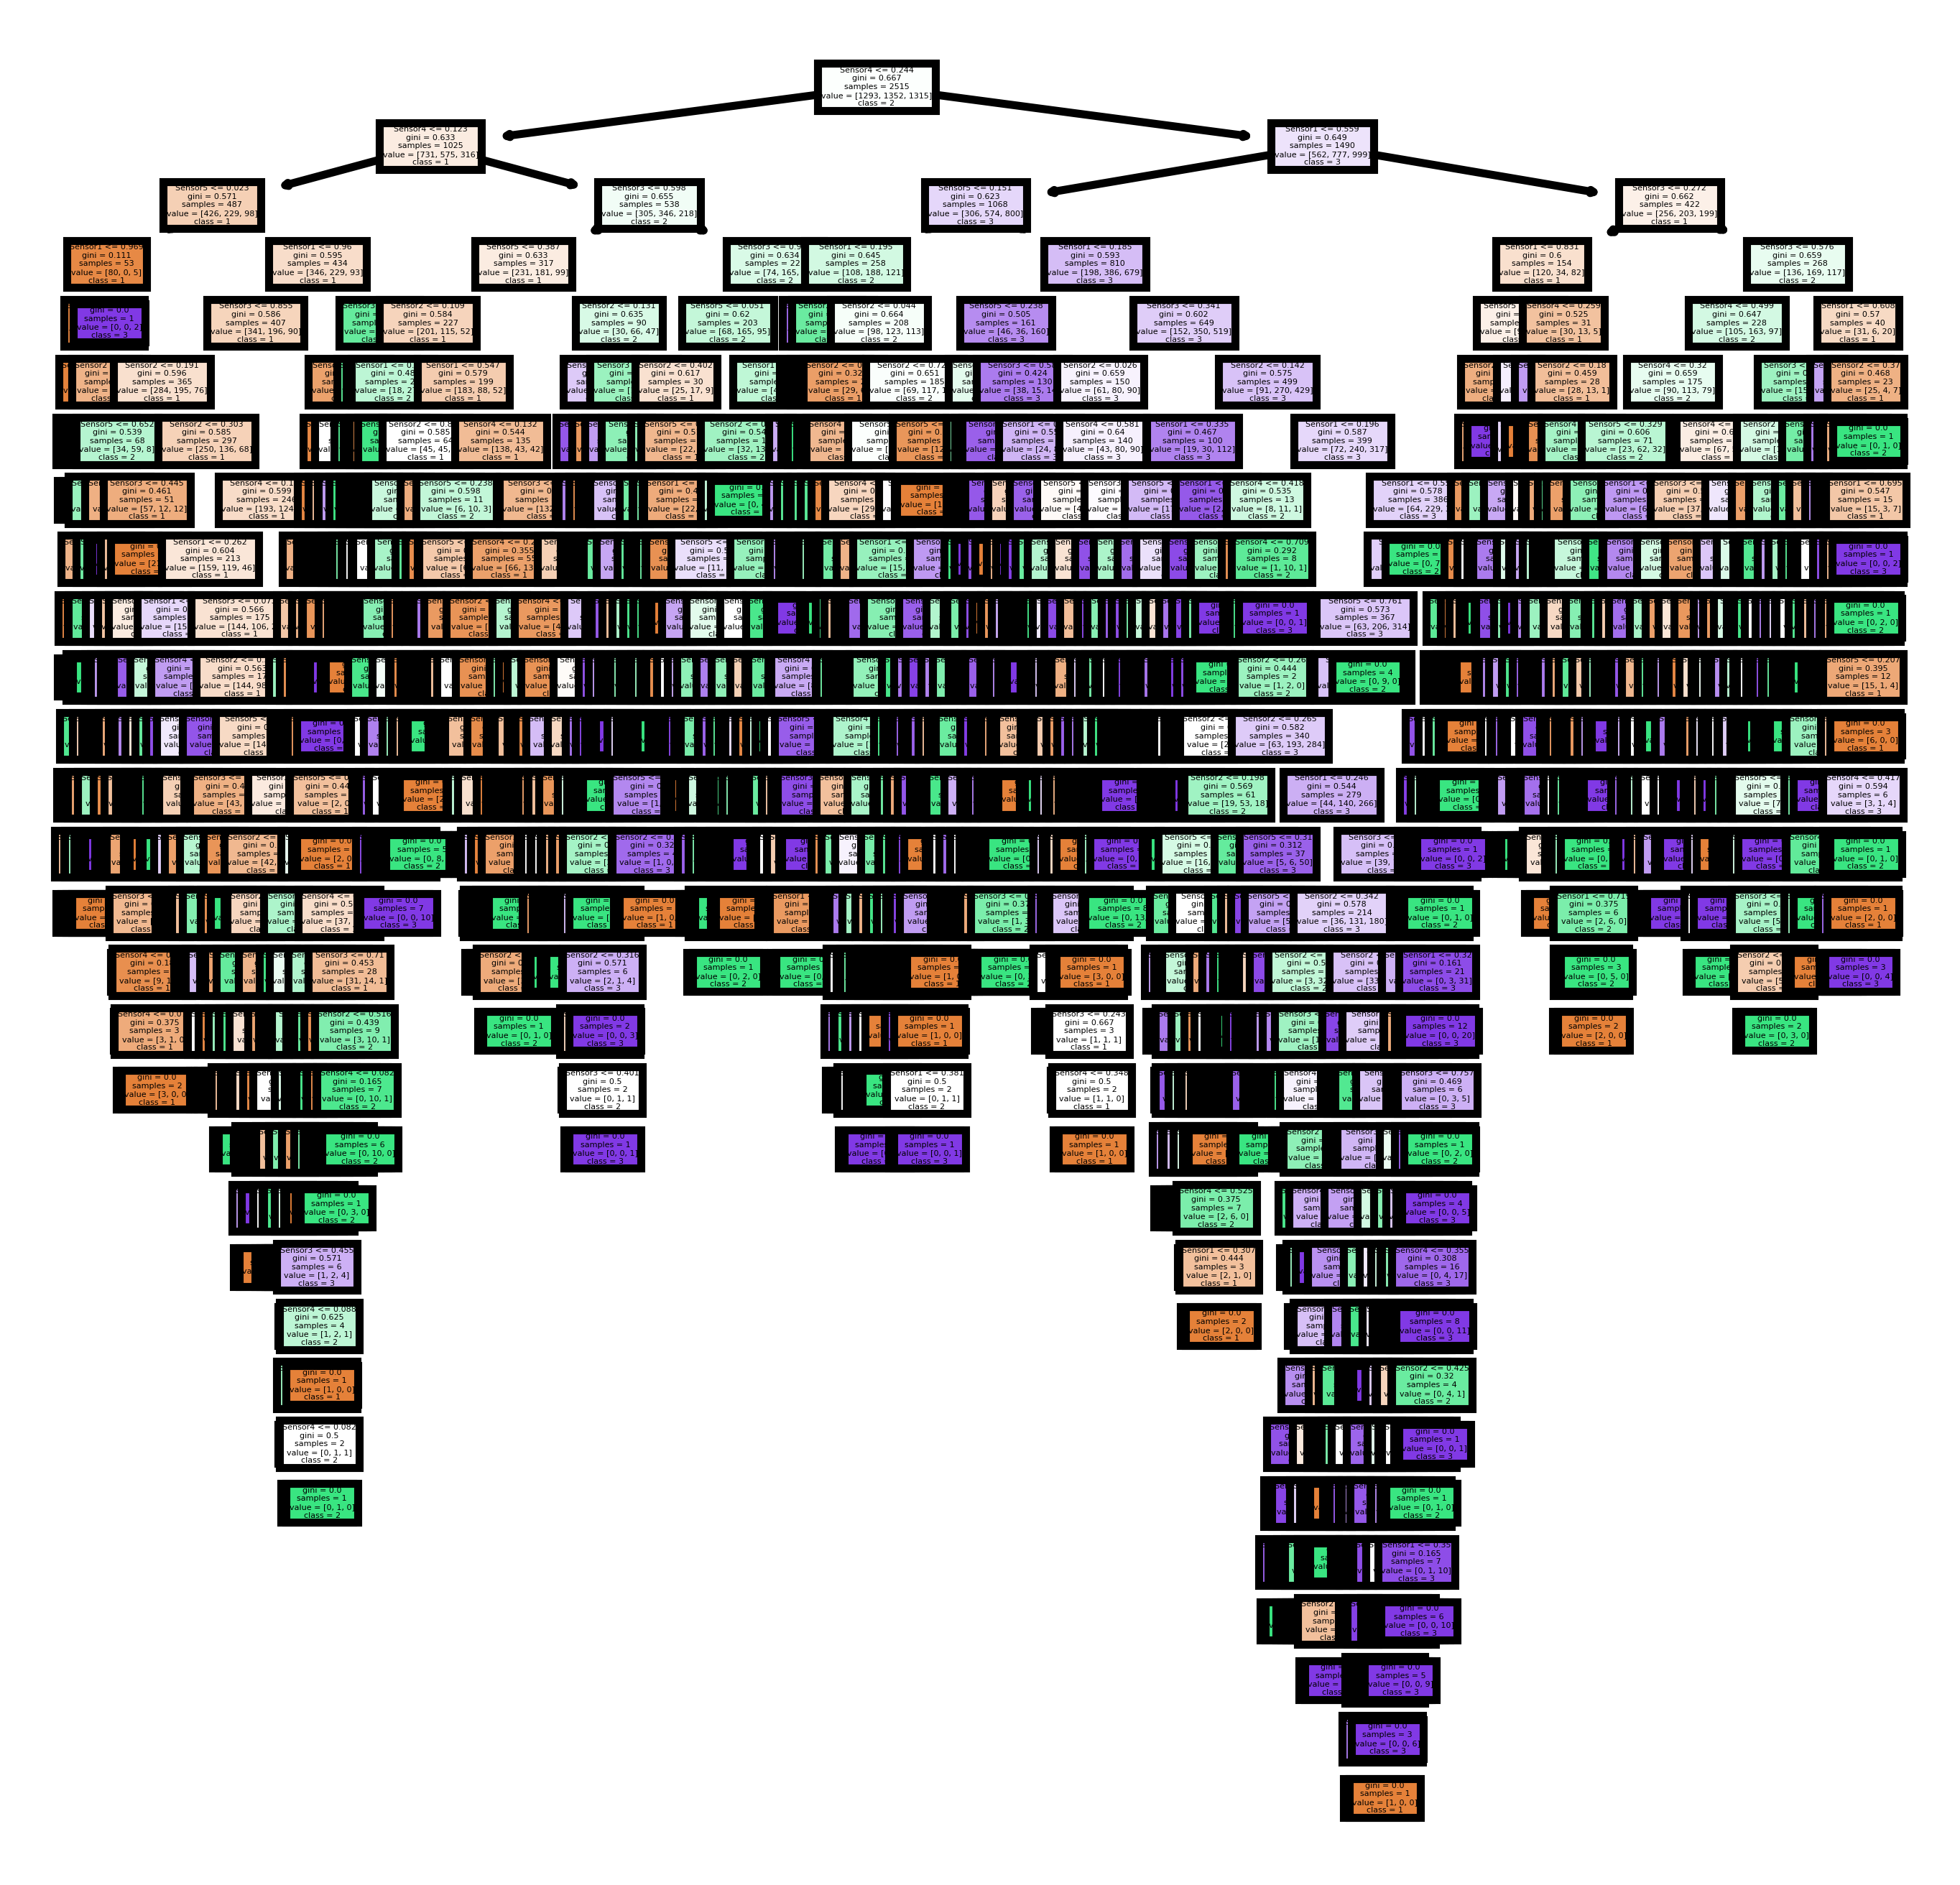

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree
fn= ['Sensor1','Sensor2','Sensor3','Sensor4','Sensor5','Sensor6','Sensor7','Sensor8']
cn= ['1','2','3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[1],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

